In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:

X = pd.read_csv('/Users/prathyushachelemella/Desktop/games.csv')

columns_to_drop = ['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'FG_PCT_home', 'FT_PCT_home', 
                   'FG3_PCT_home', 'TEAM_ID_away','FG_PCT_away', 'FT_PCT_away','FG3_PCT_away']

X = X.drop(columns_to_drop, axis=1)

In [3]:
X = X.fillna(0)

In [4]:
X.head()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,AST_home,REB_home,PTS_away,AST_away,REB_away,HOME_TEAM_WINS
0,22200477,1610612740,1610612759,2022,126.0,25.0,46.0,117.0,23.0,44.0,1
1,22200478,1610612762,1610612764,2022,120.0,16.0,40.0,112.0,20.0,37.0,1
2,22200466,1610612739,1610612749,2022,114.0,22.0,37.0,106.0,20.0,46.0,1
3,22200467,1610612755,1610612765,2022,113.0,27.0,49.0,93.0,15.0,46.0,1
4,22200468,1610612737,1610612741,2022,108.0,22.0,47.0,110.0,20.0,47.0,0


In [5]:
import warnings
warnings.filterwarnings("ignore")

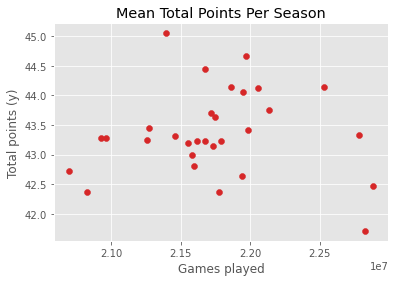

<Figure size 432x288 with 0 Axes>

In [21]:
df = pd.DataFrame(X)
season_avg = X.groupby(by=["HOME_TEAM_ID"]).mean()

with plt.style.context("ggplot"):
    plt.scatter(season_avg.GAME_ID, season_avg.REB_home, color = "#d62728" )
    plt.xlabel("Games played")
    plt.ylabel("Total points (y)")
    plt.title("Mean Total Points Per Season")
fig4 = plt.figure();

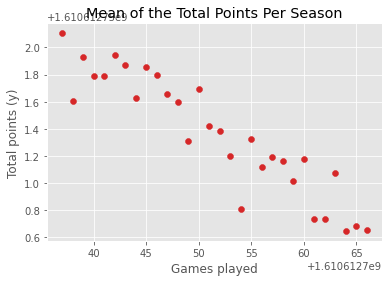

<Figure size 432x288 with 0 Axes>

In [24]:
season_avg = X.groupby(by=["VISITOR_TEAM_ID"]).mean()

with plt.style.context("ggplot"):
    plt.scatter(season_avg.index, season_avg.HOME_TEAM_ID, color = "#d62728" )
    plt.xlabel("Games played")
    plt.ylabel("Total points (y)")
    plt.title("Mean of the Total Points Per Season")
fig4 = plt.figure();

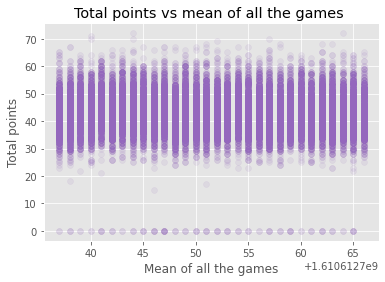

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
df = pd.DataFrame(X)

with plt.style.context("ggplot"):
    plt.scatter(X.HOME_TEAM_ID, X.REB_home, marker="o", alpha=0.1, color='#9467bd')
    plt.xlabel("Mean of all the games")
    plt.ylabel("Total points")
    plt.title("Total points vs mean of all the games ")
fig1 = plt.figure();

In [8]:
X.dtypes

GAME_ID              int64
HOME_TEAM_ID         int64
VISITOR_TEAM_ID      int64
SEASON               int64
PTS_home           float64
AST_home           float64
REB_home           float64
PTS_away           float64
AST_away           float64
REB_away           float64
HOME_TEAM_WINS       int64
dtype: object

In [9]:
X['GAME_ID'].value_counts()

22000032    2
22000053    2
22000072    2
22000018    2
22000076    2
           ..
21000404    1
21000403    1
21000402    1
21000401    1
11400001    1
Name: GAME_ID, Length: 26622, dtype: int64

In [10]:
X.describe().T.applymap('{:,.4f}'.format)

,count,mean,std,min,25%,50%,75%,max
GAME_ID,"26,651.0000","21,754,866.9607","5,570,189.4743","10,300,001.0000","20,700,010.5000","21,200,763.0000","21,800,046.5000","52,100,211.0000"
HOME_TEAM_ID,"26,651.0000","1,610,612,751.3676",8.6387,"1,610,612,737.0000","1,610,612,744.0000","1,610,612,751.0000","1,610,612,759.0000","1,610,612,766.0000"
VISITOR_TEAM_ID,"26,651.0000","1,610,612,751.4080",8.6593,"1,610,612,737.0000","1,610,612,744.0000","1,610,612,751.0000","1,610,612,759.0000","1,610,612,766.0000"
SEASON,"26,651.0000","2,012.1139",5.5870,"2,003.0000","2,007.0000","2,012.0000","2,017.0000","2,022.0000"
PTS_home,"26,651.0000",103.0716,14.6767,0.0000,94.0000,103.0000,112.0000,168.0000
AST_home,"26,651.0000",22.7387,5.3664,0.0000,19.0000,23.0000,26.0000,50.0000
REB_home,"26,651.0000",43.2132,7.1204,0.0000,39.0000,43.0000,48.0000,72.0000
PTS_away,"26,651.0000",100.2660,14.7424,0.0000,91.0000,100.0000,109.0000,168.0000
AST_away,"26,651.0000",21.4164,5.3144,0.0000,18.0000,21.0000,25.0000,46.0000
REB_away,"26,651.0000",41.9568,7.0061,0.0000,38.0000,42.0000,46.0000,81.0000


In [12]:
X = pd.read_csv('/Users/prathyushachelemella/Desktop/games.csv')

columns_to_drop = ['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'TEAM_ID_home', 'FG_PCT_home', 'FT_PCT_home', 
                   'FG3_PCT_home', 'TEAM_ID_away','FG_PCT_away', 'FT_PCT_away','FG3_PCT_away']

X = X.drop(columns_to_drop, axis=1)

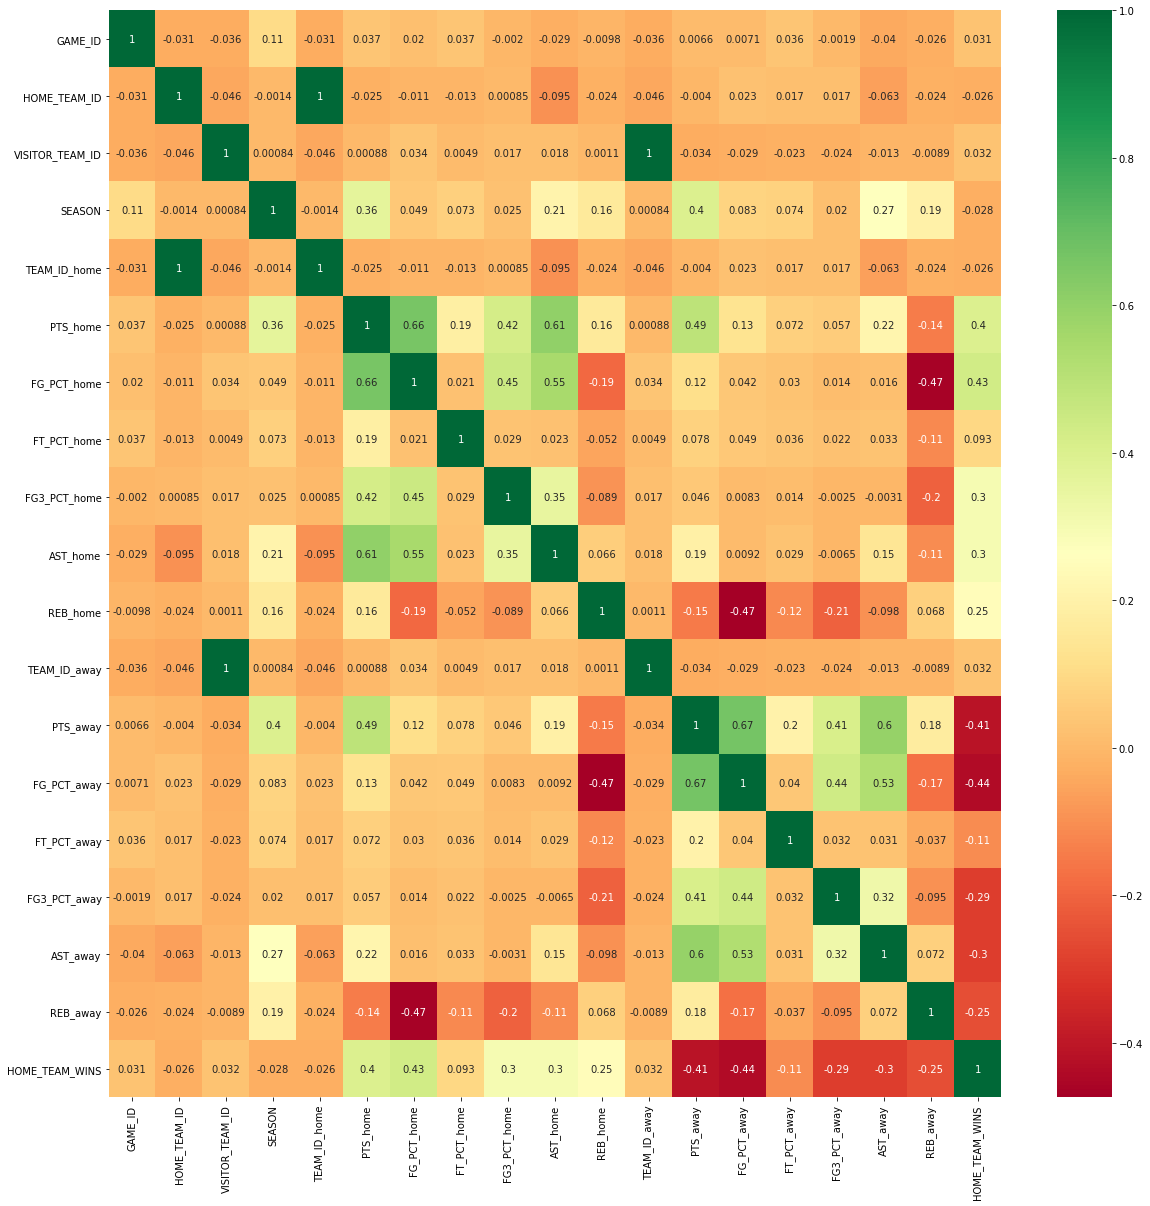

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
X = pd.read_csv("/Users/prathyushachelemella/Desktop/games.csv")
X1 = X.iloc[:,0:20] 
y = X.iloc[:,-1]    

corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")




In [30]:
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("/Users/prathyushachelemella/Desktop/games.csv")

# Remove irrelevant features
data = data.drop(['FT_PCT_home', 'FG_PCT_home', 'FG_PCT_away', 'FT_PCT_away'], axis=1)

# Calculate correlation coefficients
corr_matrix = data.corr()
corr_target = abs(corr_matrix["HOME_TEAM_WINS"])

# Select features with high correlation
relevant_features = corr_target[corr_target > 0.5]